# Import

In [62]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import fft
import pandas as pd
from scipy.optimize import curve_fit

#import script to read file+
exec(open('C:/Users/Setup3-PC/Desktop/qudi/user_scripts/Timo/own/console_toolkit.py').read())

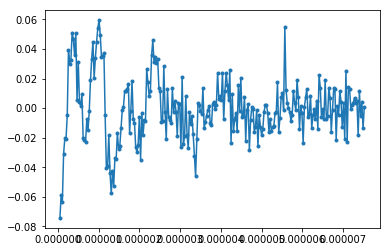

In [46]:
#upload and store data
path = r'E:\Data\2024\03\20240312\PulsedMeasurement\20240312-1215-09_pulsed_measurement.dat'
pulsed_data = load_pulsed_result(path)

pulsed_data["data"][0:5]

time = pulsed_data["data"]["tau"]
signal = pulsed_data["data"]["z1"] - pulsed_data["data"]["z2"]
#plt.plot(time, signal, marker=".")

In [68]:
#fft
ampli_f = fft(signal)

#compute magnitude - quadrature sum or Re and Im
N = len(ampli_f)
magnitude = np.abs(ampli_f)
#phase = np.angle(ampli_f)

# compute frequency max as the inverse of the time step
fmax = 1/(time[1]-time[0])
fstep = fmax/(len(time) - 1)
freq = np.arange(0, fmax+fstep, fstep)
mag = magnitude/(len(time)/2)

(0, 3000000.0)

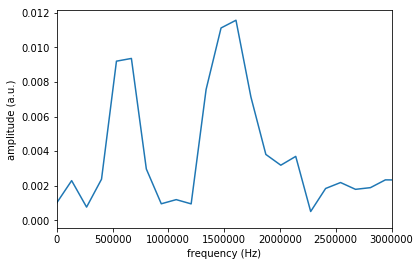

In [92]:
plt.plot(freq, mag)
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude (a.u.)')
#plt.xlim(1.15*10**6,1.9*10**6)
plt.xlim(0,0.3*10**7)

In [80]:
indices = np.where(freq < 1.1*10**6)
lor_fit_mag = mag[indices]
lor_fit_freq = freq[indices]

def lorentzian(x,a,x0,gamma):
    return a*gamma**2 / ((x-x0)**2 + gamma**2)

guess = [1, 600000, 1]
fit_param, pcov = curve_fit(lorentzian, lor_fit_freq, lor_fit_mag, p0=guess)

#plt.scatter(lor_fit_freq, lor_fit_mag, color="blue")
#plt.plot(lor_fit_freq, lorentzian(lor_fit_freq, *fit_param), color="red")

ind_sort = np.argsort(-mag)
print(freq[ind_sort[:4]])

[31860776.43908969  1606425.70281124  1472556.89424364 31994645.24765729]


In [100]:
order = 12
print(f'H linewidth:\t\t{1/(8*order*0.23)}')
print(f'C linewidth:\t\t{1/(8*order*0.92)}')

H linewidth:		0.04528985507246376
C linewidth:		0.01132246376811594
